In [15]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
T = 10

data = pd.read_csv("dataCircle.txt", 
                   names=['x_1', 'x_2', 'y'],
                   delim_whitespace=True,
                   dtype={"x_1": np.float64, "x_2": np.float64, "y": np.int64},
                   converters={"y": lambda x: float(x) * 2 - 1}
                  )

m = len(data)
D = [1/m] * m

def gen_classifier(data):
    feature = random.choice(["x_1", "x_2"])
    bounds = (data[feature].min(), data[feature].max())
    threshold = np.random.uniform(bounds[0], bounds[1])
    parity = 1.0
    classifier = lambda x: parity if x[feature] > threshold else -parity
    if ϵ(classifier) >= 0.5:
        parity = -1
    return lambda x: parity if x[feature] > threshold else -parity

def ϵ(h, D=None):
    s = 0
    filtered = data[data.apply(lambda x: x["y"] != h(x), axis=1)]
    for i, (x1, x2, y) in filtered.iterrows():
        s += D[i] if D else 1/m
    return s

model = []
for t in range(T):
    classifier_candidates = [gen_classifier(data) for _ in range(100)]
    classifier = min(classifier_candidates, key=lambda x: ϵ(x))
    error = ϵ(classifier)
    alpha = 1/2 * np.log((1 - error) / error)
    model.append((alpha, classifier))
    D = [d * np.exp(-alpha * data["y"][i] * classifier(data.ix[i])) for i, d in enumerate(D)]
    Z = 1 / sum(D)
    D = [Z * d for d in D]
    
    
def scatter(data_frame):
    data_frame.plot.scatter(x="x_1", y="x_2", c="y", colormap="cool")
    
def plot_lines(lol):
    plt.axvline(2)

def F(x, model):
    return 1 if sum((a * h(x) for a, h in model)) > 0 else -1

#for x in range(len(data)):
#    print(F(data.ix[x], model), data.ix[x]["y"])


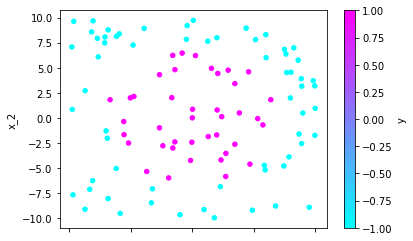

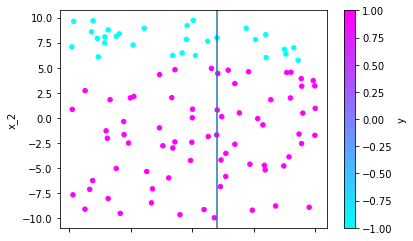

In [37]:
scatter(data)
predicted = data.apply(lambda x: [x["x_1"], x["x_2"], F(x, model)], axis=1)
scatter(predicted)
